In [171]:
import pandas as pd
emp={"name":["ankit","boss","preeti"],"gender":["male","male","female"],"mail":["ankit@gmail.com","boss@gmail.com","preeti@gmail.com"]} 
df=pd.DataFrame(emp)
df.iloc[:,0:3]
df.loc[0:2,:]

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com


In [23]:
df.loc[["ankit@gmail.com","boss@gmail.com"],["name","gender"]]

,name,gender
mail,,
ankit@gmail.com,ankit,male
boss@gmail.com,boss,male


In [26]:
df.reset_index(inplace=True)
df

,index,mail,name,gender
0,0,ankit@gmail.com,ankit,male
1,1,boss@gmail.com,boss,male
2,2,preeti@gmail.com,preeti,female


In [30]:
df[(df.name=='ankit')|(df.name=='boss')]

,index,mail,name,gender
0,0,ankit@gmail.com,ankit,male
1,1,boss@gmail.com,boss,male


In [47]:
df[df.name.isna()]

,name,gender,mail


In [34]:
df[(df.name=='ankit')|(df.name=='boss')][['name','gender']]

,name,gender
0,ankit,male
1,boss,male


In [49]:
type(df[(df.name=='ankit')|(df.name=='boss')]['name'])

pandas.core.series.Series

In [45]:
df[(df.name=='ankit')|(df.name=='boss')]['name'].index
df[(df.name=='ankit')|(df.name=='boss')]['name'].values

array(['ankit', 'boss'], dtype=object)

In [56]:
df.loc[0,['name','gender']]=['ankitbansal','male']
df

,name,gender,mail
0,ankitbansal,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com


In [64]:
fc=df.gender.isin(['male'])
df[fc]

,name,gender,mail
0,ankitbansal,male,ankit@gmail.com
1,boss,male,boss@gmail.com


In [65]:
df.name.str.upper()

0    ANKITBANSAL
1           BOSS
2         PREETI
Name: name, dtype: object

In [74]:
df['salary']=10000
df.loc[1,'salary']=20000
df.loc[2,'salary']=30000
fc=df.gender=='male'
df.loc[fc,'salary']=50000
df

,name,gender,mail,salary
0,ankitbansal,male,ankit@gmail.com,50000
1,boss,male,boss@gmail.com,50000
2,preeti,female,preeti@gmail.com,30000


In [80]:
df.sort_values(by=['salary','name'],ascending=[True,True])

,name,gender,mail,salary
2,preeti,female,preeti@gmail.com,30000
0,ankitbansal,male,ankit@gmail.com,50000
1,boss,male,boss@gmail.com,50000


In [83]:
df.sort_index(ascending=False)

,name,gender,mail,salary
2,preeti,female,preeti@gmail.com,30000
1,boss,male,boss@gmail.com,50000
0,ankitbansal,male,ankit@gmail.com,50000


In [321]:
import pandas as pd
df=pd.read_csv('orders.txt')
df.head(5)

,order_id,order_date,customer_name,city,category,product_id,sales,profit
0,CA-2018-100006,2018-09-07,Dennis Kane,New York City,Technology,TEC-PH-10002075,377.970,109.6113
1,CA-2018-100090,2018-07-08,Ed Braxton,San Francisco,Furniture,FUR-TA-10003715,502.488,-87.9354
2,CA-2018-100293,2018-03-14,Neil Französisch,Jacksonville,Office Supplies,OFF-PA-10000176,91.056,31.8696
3,CA-2018-100328,2018-01-28,Jasper Cacioppo,New York City,Office Supplies,OFF-BI-10000343,3.928,1.3257
4,CA-2018-100363,2018-04-08,Jim Mitchum,Glendale,Office Supplies,OFF-FA-10000611,2.368,0.8288


In [85]:
df.category.value_counts()

category
Office Supplies    2773
Furniture          1764
Technology          472
Name: count, dtype: int64

In [196]:
df_cat=df.groupby('category')['sales'].sum()
df_cat

category
Furniture          628359.3048
Office Supplies    298596.7520
Technology         180636.8480
Name: sales, dtype: float64

In [93]:
df_cat.index
df_cat.values

array([628359.3048, 298596.752 , 180636.848 ])

In [98]:
df_cat=pd.DataFrame(df_cat)
df_cat.reset_index(inplace=True)
type(df_cat)

pandas.core.frame.DataFrame

In [99]:
df_cat=df.groupby('category',as_index=False)['sales'].sum()
df_cat

,category,sales
0,Furniture,628359.3048
1,Office Supplies,298596.7520
2,Technology,180636.8480


In [112]:
import matplotlib.pyplot as plt
df_plot=df.groupby('category',as_index=False).agg({'sales':'sum','profit':'sum'})

<Axes: ylabel='count'>

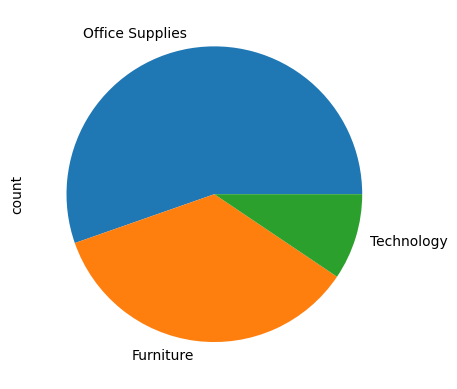

In [121]:
df.category.value_counts().plot(kind='pie')

<BarContainer object of 3 artists>

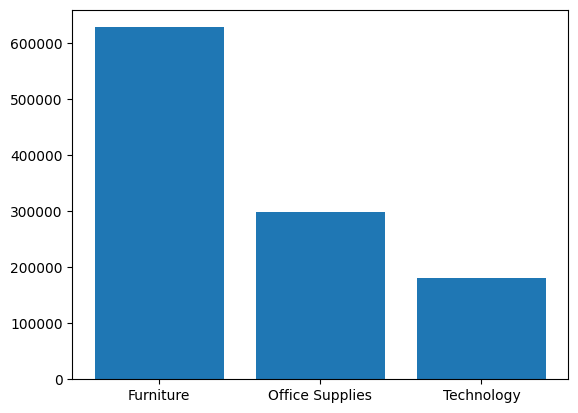

In [132]:
plt.bar(df_plot.category,df_plot.sales)

<BarContainer object of 3 artists>

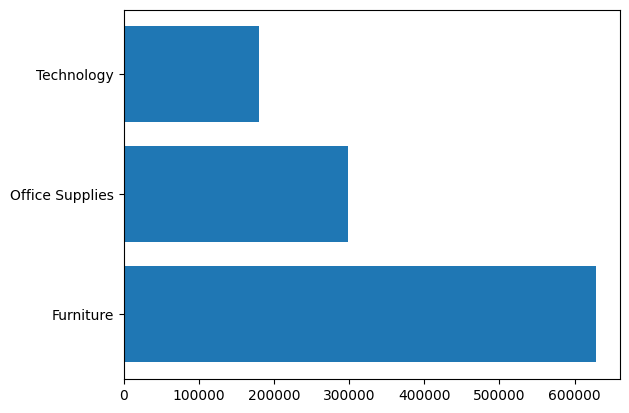

In [143]:
plt.barh(df_plot.category,df_plot.sales)

<Axes: xlabel='order_month,order_month_name'>

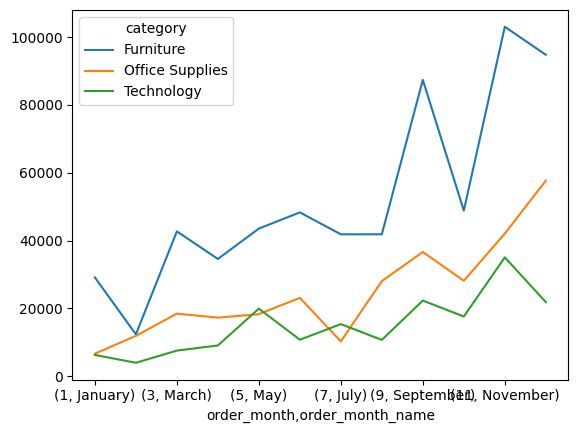

In [276]:
import pandas as pd
df['order_date']=pd.to_datetime(df['order_date'])
df['order_month']=pd.to_datetime(df['order_date'],format='%B').dt.month
df['order_month_name']=df['order_date'].dt.strftime('%B')
df_pivot=df.pivot_table(index=['order_month','order_month_name'],columns='category',values='sales',aggfunc='sum')
df

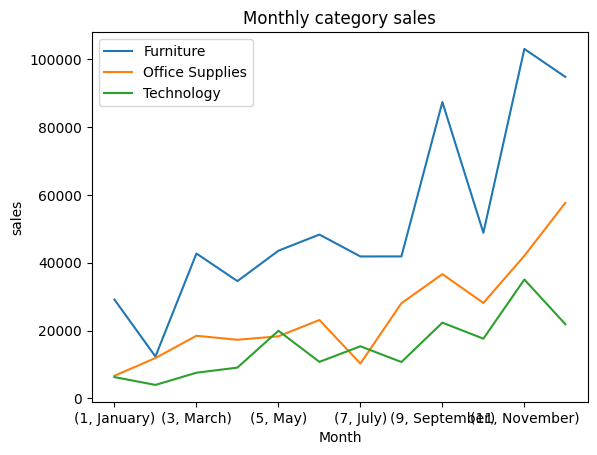

In [302]:
df_pivot=df.pivot_table(index=['order_month','order_month_name'],columns='category',values='sales',aggfunc='sum')
df_pivot.plot(kind='line')
plt.title('Monthly category sales')
plt.xlabel('Month')
plt.ylabel('sales')
plt.legend()
plt.show()

In [303]:
df_pivot

,category,Furniture,Office Supplies,Technology
order_month,order_month_name,,,
1,January,29137.8036,6670.365,6291.090
2,February,12355.8214,11907.247,3981.234
3,March,42720.6218,18463.361,7571.044
4,April,34584.6491,17294.624,9088.770
5,May,43540.0327,18310.199,19945.452
6,June,48305.8333,23115.613,10781.253
7,July,41850.8880,10278.014,15374.045
8,August,41858.2370,28049.223,10727.620
9,September,87372.4417,36643.131,22329.438


In [253]:
import matplotlib.pyplot as plt
plt.bar(x=df_pivot.city)

TypeError: bar() missing 1 required positional argument: 'height'

In [187]:
df_pivot.dropna(inplace=True)
df_pivot

0       True
1      False
2      False
3      False
4      False
       ...  
112     True
113     True
114    False
115    False
116    False
Name: city, Length: 117, dtype: bool

In [180]:
df_pivot.reset_index(inplace=True)

In [194]:
df

,order_id,order_date,customer_name,city,category,product_id,sales,profit
0,CA-2018-100006,2018-09-07,Dennis Kane,New York City,Technology,TEC-PH-10002075,377.970,109.6113
1,CA-2018-100090,2018-07-08,Ed Braxton,San Francisco,Furniture,FUR-TA-10003715,502.488,-87.9354
2,CA-2018-100293,2018-03-14,Neil Französisch,Jacksonville,Office Supplies,OFF-PA-10000176,91.056,31.8696
3,CA-2018-100328,2018-01-28,Jasper Cacioppo,New York City,Office Supplies,OFF-BI-10000343,3.928,1.3257
4,CA-2018-100363,2018-04-08,Jim Mitchum,Glendale,Office Supplies,OFF-FA-10000611,2.368,0.8288
...,...,...,...,...,...,...,...,...
5004,US-2021-168802,2021-11-03,Jack O'Briant,Seattle,Office Supplies,OFF-BI-10002393,18.368,5.9696
5005,US-2021-169320,2021-07-23,Lena Hernandez,Elkhart,Office Supplies,OFF-AR-10003602,11.680,5.4896
5006,US-2021-169488,2021-09-07,Allen Armold,Providence,Office Supplies,OFF-PA-10000157,39.960,18.7812
5007,US-2021-169502,2021-08-28,Matthew Grinstein,Milwaukee,Office Supplies,OFF-AP-10001947,91.600,26.5640


In [305]:
import numpy as np
emp={"name":["ankit","boss","preeti"],"gender":["male","male","female"],"mail":["ankit@gmail.com","boss@gmail.com","preeti@gmail.com"]} 
df1=pd.DataFrame(emp)
emp={"name":["ankit","boss","xxxx"],"gender":["male","male","female"],"mail":[np.nan,np.nan,"preeti@gmail.com"]} 
#emp={"name":["saddsf","dfdsf"],"gender":["male","male"],"mail":["dfdf@gmail.com","dfdf@gmail.com"]} 
df2=pd.DataFrame(emp)
df=pd.concat([df1,df2],ignore_index=True)
df

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com
3,ankit,male,NaN
4,boss,male,NaN
5,xxxx,female,preeti@gmail.com


In [211]:
df.dropna(subset='mail')
df

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com
3,ankit,male,NaN
4,boss,male,NaN
5,xxxx,female,preeti@gmail.com


In [218]:
df.drop_duplicates(subset='mail')
df.loc[df.name=='xxxx','name']='preeti'
df

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com
3,ankit,male,NaN
4,boss,male,NaN
5,preeti,female,preeti@gmail.com


In [215]:
df.drop_duplicates(subset=['mail','name'])

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com
3,ankit,male,NaN
4,boss,male,NaN
5,xxxx,female,preeti@gmail.com


In [219]:
df.drop_duplicates()

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com
3,ankit,male,NaN
4,boss,male,NaN


In [225]:
df.drop(df[df.mail.isna()].index)
df

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com
3,ankit,male,NaN
4,boss,male,NaN
5,preeti,female,preeti@gmail.com


In [227]:
df.mail.fillna('abc@gmail.com')
df

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com
3,ankit,male,NaN
4,boss,male,NaN
5,preeti,female,preeti@gmail.com


In [230]:
df.dropna(how='any',axis=1)
df

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com
3,ankit,male,NaN
4,boss,male,NaN
5,preeti,female,preeti@gmail.com


In [307]:
df.dropna()

,name,gender,mail
0,ankit,male,ankit@gmail.com
1,boss,male,boss@gmail.com
2,preeti,female,preeti@gmail.com
5,xxxx,female,preeti@gmail.com


In [309]:
import psycopg2 as psy

In [316]:
def create_table():
    conn = psy.connect(dbname="postgres", user="postgres", password="postgres", host="localhost", port="5432")
    cur = conn.cursor()
    cur.execute("CREATE TABLE IF NOT EXISTS store1(item TEXT, quantity TEXT, price TEXT)")
    conn.commit()
    conn.close()

In [318]:
create_table()

In [ ]:
conn = psy.connect(dbname="postgres", user="postgres", password="postgres", host="localhost", port="5432")
df.to_sql('store1',con=conn,index=False)

In [ ]:
def order_price(*kwargs):
    print(kwargs)
    return kwargs[0]-kwargs[1]

df['order_price']=df.apply(order_price(df.sales,df.profit))
df.head(5)

In [340]:
df.head(5)

,order_id,order_date,customer_name,city,category,product_id,sales,profit,order_price
0,CA-2018-100006,2018-09-07,Dennis Kane,New York City,Technology,TEC-PH-10002075,377.970,109.6113,268.3587
1,CA-2018-100090,2018-07-08,Ed Braxton,San Francisco,Furniture,FUR-TA-10003715,502.488,-87.9354,590.4234
2,CA-2018-100293,2018-03-14,Neil Französisch,Jacksonville,Office Supplies,OFF-PA-10000176,91.056,31.8696,59.1864
3,CA-2018-100328,2018-01-28,Jasper Cacioppo,New York City,Office Supplies,OFF-BI-10000343,3.928,1.3257,2.6023
4,CA-2018-100363,2018-04-08,Jim Mitchum,Glendale,Office Supplies,OFF-FA-10000611,2.368,0.8288,1.5392


In [328]:
def getsum3(*args,**kwargs):
    print(args, type(args))
    print(kwargs,type(kwargs))


d=getsum3(1,2,3,a=2,b=2,c=3)

(1, 2, 3) <class 'tuple'>
{'a': 2, 'b': 2, 'c': 3} <class 'dict'>


In [330]:
def getsum3(**kwargs):
    print(kwargs,type(kwargs))
    print('name', kwargs['name'])


d=getsum3(id=24,name='Rahul',age=35)

{'id': 24, 'name': 'Rahul', 'age': 35} <class 'dict'>
name Rahul


In [331]:
def getsum3(*args):
    print(args,type(args))
    num=0
    for a in args:
        num=num+a
    return num

d=getsum3(1,2,3)

(1, 2, 3) <class 'tuple'>


In [338]:
def getsum(a,b):
    print(a,type(a))

d= getsum(b=1.0,a=2)

2 <class 'int'>


In [341]:
def order_price(row):
    return row['sales'] - row['profit']
    

df['order_price']=df.apply(order_price,axis=1)

In [346]:
df['flag']=df['profit'].apply(lambda p: 'profitable' if p>0 else 'non profitable')
df['order_price']=df.apply(lambda row:row['sales']-row['profit'],axis=1)

In [344]:
df

,order_id,order_date,customer_name,city,category,product_id,sales,profit,order_price,flag
0,CA-2018-100006,2018-09-07,Dennis Kane,New York City,Technology,TEC-PH-10002075,377.970,109.6113,268.3587,profitable
1,CA-2018-100090,2018-07-08,Ed Braxton,San Francisco,Furniture,FUR-TA-10003715,502.488,-87.9354,590.4234,non profitable
2,CA-2018-100293,2018-03-14,Neil Französisch,Jacksonville,Office Supplies,OFF-PA-10000176,91.056,31.8696,59.1864,profitable
3,CA-2018-100328,2018-01-28,Jasper Cacioppo,New York City,Office Supplies,OFF-BI-10000343,3.928,1.3257,2.6023,profitable
4,CA-2018-100363,2018-04-08,Jim Mitchum,Glendale,Office Supplies,OFF-FA-10000611,2.368,0.8288,1.5392,profitable
...,...,...,...,...,...,...,...,...,...,...
5004,US-2021-168802,2021-11-03,Jack O'Briant,Seattle,Office Supplies,OFF-BI-10002393,18.368,5.9696,12.3984,profitable
5005,US-2021-169320,2021-07-23,Lena Hernandez,Elkhart,Office Supplies,OFF-AR-10003602,11.680,5.4896,6.1904,profitable
5006,US-2021-169488,2021-09-07,Allen Armold,Providence,Office Supplies,OFF-PA-10000157,39.960,18.7812,21.1788,profitable
5007,US-2021-169502,2021-08-28,Matthew Grinstein,Milwaukee,Office Supplies,OFF-AP-10001947,91.600,26.5640,65.0360,profitable
